In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats
plt.style.use('seaborn-whitegrid')
from matplotlib import legend
import random

In [28]:
# data reading and preprocessing
df=pd.read_excel('RE-PHIconc.xlsx')
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'A1', 'A2', 'A3'],inplace=True)
df.head()

,x,y_exp,y_corr,diff,sq diff
0,0.610012,0.400318,0.272544,-0.127774,0.016326
1,0.604862,0.375898,0.269231,-0.106666,0.011378
2,0.598992,0.291566,0.265590,-0.025976,0.000675
3,0.591040,0.321637,0.260877,-0.060760,0.003692
4,0.582883,0.273968,0.256298,-0.017670,0.000312


In [29]:
# creation of random data series by adding some randomness to existing data
NewArray=[]
for i in range(1433):
    x1=random.uniform(-1,1)
    NewArray.append(x1)
df['y_rand']=df['y_corr']
df['y_rand'].iloc[100:300]=df['y_rand'].iloc[100:300]+NewArray[100:300]
df['y_rand'].iloc[600:700]=df['y_rand'].iloc[600:700]+NewArray[600:700]
df['y_rand'].iloc[900:1000]=df['y_rand'].iloc[900:1000]+NewArray[900:1000]
df['y_rand'].iloc[1300:1400]=df['y_rand'].iloc[1300:1400]+NewArray[1300:1400]
df.head()

,x,y_exp,y_corr,diff,sq diff,y_rand
0,0.610012,0.400318,0.272544,-0.127774,0.016326,0.272544
1,0.604862,0.375898,0.269231,-0.106666,0.011378,0.269231
2,0.598992,0.291566,0.265590,-0.025976,0.000675,0.265590
3,0.591040,0.321637,0.260877,-0.060760,0.003692,0.260877
4,0.582883,0.273968,0.256298,-0.017670,0.000312,0.256298


Text(0.5, 1.0, 'Reference data series')

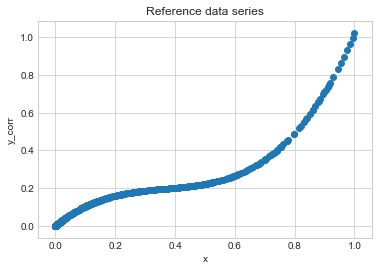

In [30]:
# primary data visualization
plt.scatter(df['x'],df['y_corr'])
plt.xlabel('x')
plt.ylabel('y_corr')
plt.title('Reference data series')

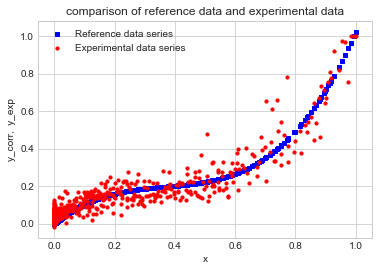

In [31]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df['x'],df['y_corr'], s=10, c='b', marker="s", label='Reference data series')
ax1.scatter(df['x'],df['y_exp'], s=10, c='r', marker="o", label='Experimental data series')
plt.legend(loc='upper left');
ax1.set_xlabel('x')
ax1.set_ylabel('y_corr,  y_exp')
ax1.set_title('comparison of reference data and experimental data')
plt.show()

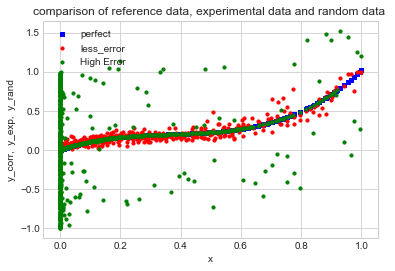

<Figure size 432x288 with 0 Axes>

In [32]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df['x'],df['y_corr'], s=10, c='b', marker="s", label='perfect')
ax1.scatter(df['x'],df['y_exp'], s=10, c='r', marker="o", label='less_error')
ax1.scatter(df['x'],df['y_rand'], s=10, c='g', marker="o", label='High Error')
ax1.set_xlabel('x')
ax1.set_ylabel('y_corr,  y_exp,  y_rand')
ax1.set_title('comparison of reference data, experimental data and random data ')
plt.legend(loc='upper left');
plt.show()
plt.savefig('comparison of reference experimental and random data.jpeg')

In [33]:
# Application of  algorithm to quantify the difference between reference dat series, experimental data and random data
# Resizing data series for ease of analysis
df.drop(df.tail(3).index,inplace=True)
reference=np.zeros((10,143))
Exp=np.zeros((10,143))
rand=np.zeros((10,143))

In [34]:
# creating subseries out of original data series
# Creating first sub series
reference[0]=df['y_corr'].iloc[0:143].T
Exp[0]=df['y_exp'].iloc[0:143].T
rand[0]=df['y_rand'].iloc[0:143].T


In [35]:
# creating the subsequent sub series using a definite rule
for k in range (8):
    a1=df['y_corr'].iloc[(145*k):((145*k)+143)].T
    reference[k+1]=a1
    m1=df['y_exp'].iloc[(145*k):((145*k)+143)].T
    Exp[k+1]=m1
    h1=df['y_rand'].iloc[(145*k):((145*k)+143)].T
    rand[k+1]=h1

In [36]:
# creating the last sub series
reference[9]=df['y_corr'].iloc[1287:1430].T
Exp[9]=df['y_exp'].iloc[1287:1430].T
rand[9]=df['y_rand'].iloc[1287:1430].T 

In [37]:
# Application of SVD(Singular vector decomposition method)
u1, s1, v1 = np.linalg.svd(reference, full_matrices=True)
u2, s2, v2 = np.linalg.svd(Exp, full_matrices=True)
u3, s3, v3 = np.linalg.svd(rand, full_matrices=True)

In [38]:
# selection of first four feature vectors
u11=u1[:,[0,1,2,3]]
u22=u2[:,[0,1,2,3]]
u33=u3[:,[0,1,2,3]]

In [39]:
# comparison of reference dat series with experimental data series
mat_re=np.dot(u11.T,u22)
# comparison of refence data series with random data series
mat_rr=np.dot(u11.T,u33)

In [40]:
# Again application of SVD
ure,sre,vre=np.linalg.svd(mat_re, full_matrices=True)
urr,srr,vrr=np.linalg.svd(mat_rr, full_matrices=True)


In [41]:
# quantitative value of anomaly in experimenta data series and random data series(anomaly index)
a=[1-sre[0],1-srr[0]]

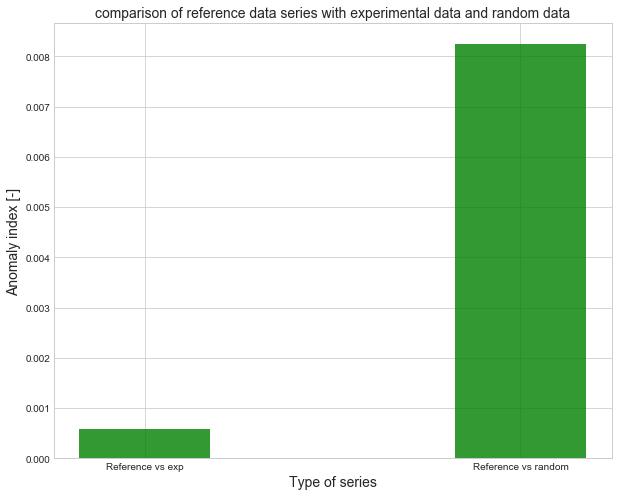

In [42]:
# visualization of anomaly or difference between reference, experimental and random data series in terms of anomaly index
fig= plt.figure(figsize=(10,8)) 
index=['Reference vs exp','Reference vs random']
bar_width = 0.35
opacity = 0.8
rects = plt.bar(index, a, bar_width,alpha=opacity,color='g')
plt.xlabel('Type of series',fontsize=14)
plt.ylabel('Anomaly index [-]',fontsize=14)
plt.title('comparison of reference data series with experimental data and random data',fontsize=14)
plt.savefig('Anomaly index.jpeg')

In [90]:
# repeating the projct with reduction in randomness
# data reading and preprocessing
df=pd.read_excel('RE-PHIconc.xlsx')
df.drop(columns=['Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'A1', 'A2', 'A3'],inplace=True)


In [91]:
# creation of random data series by reducing randomness in the existing data
NewArray=[]
for i in range(1433):
    x1=random.uniform(-1,1)
    NewArray.append(x1)
df['y_rand']=df['y_corr']
df['y_rand'].iloc[100:300]=df['y_rand'].iloc[100:300]+NewArray[100:300]
df['y_rand'].iloc[600:700]=df['y_rand'].iloc[600:700]+NewArray[600:700]
df['y_rand'].iloc[1100:1200]=df['y_rand'].iloc[1100:1200]+NewArray[1100:1200]

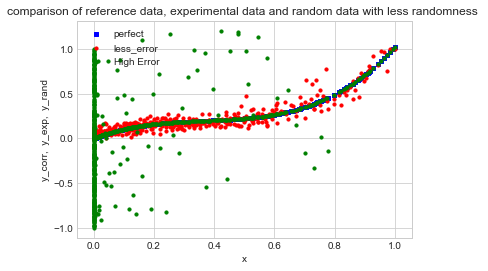

<Figure size 432x288 with 0 Axes>

In [95]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df['x'],df['y_corr'], s=10, c='b', marker="s", label='perfect')
ax1.scatter(df['x'],df['y_exp'], s=10, c='r', marker="o", label='less_error')
ax1.scatter(df['x'],df['y_rand'], s=10, c='g', marker="o", label='High Error')
ax1.set_xlabel('x')
ax1.set_ylabel('y_corr,  y_exp,  y_rand')
ax1.set_title('comparison of reference data, experimental data and random data with less randomness ')
plt.legend(loc='upper left');
plt.show()
plt.savefig('comparison of data series with less randomness')

In [93]:
df.drop(df.tail(3).index,inplace=True)
reference=np.zeros((10,143))
Exp=np.zeros((10,143))
rand=np.zeros((10,143))
reference[0]=df['y_corr'].iloc[0:143].T
Exp[0]=df['y_exp'].iloc[0:143].T
rand[0]=df['y_rand'].iloc[0:143].T
for k in range (8):
    a1=df['y_corr'].iloc[(145*k):((145*k)+143)].T
    reference[k+1]=a1
    m1=df['y_exp'].iloc[(145*k):((145*k)+143)].T
    Exp[k+1]=m1
    h1=df['y_rand'].iloc[(145*k):((145*k)+143)].T
    rand[k+1]=h1
reference[9]=df['y_corr'].iloc[1287:1430].T
Exp[9]=df['y_exp'].iloc[1287:1430].T
rand[9]=df['y_rand'].iloc[1287:1430].T 
u1, s1, v1 = np.linalg.svd(reference, full_matrices=True)
u2, s2, v2 = np.linalg.svd(Exp, full_matrices=True)
u3, s3, v3 = np.linalg.svd(rand, full_matrices=True)
u11=u1[:,[0,1,2,3]]
u22=u2[:,[0,1,2,3]]
u33=u3[:,[0,1,2,3]]
mat_re=np.dot(u11.T,u22)
mat_rr=np.dot(u11.T,u33)
ure,sre,vre=np.linalg.svd(mat_re, full_matrices=True)
urr,srr,vrr=np.linalg.svd(mat_rr, full_matrices=True)
a=[1-sre[0],1-srr[0]]

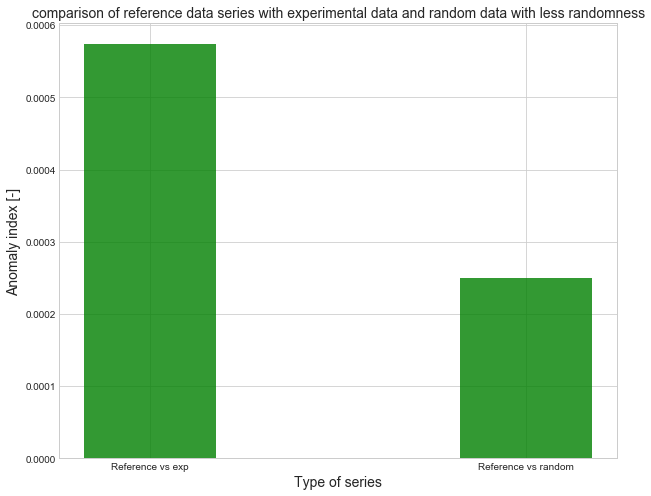

In [96]:
fig= plt.figure(figsize=(10,8)) 
index=['Reference vs exp','Reference vs random']
bar_width = 0.35
opacity = 0.8
rects = plt.bar(index, a, bar_width,alpha=opacity,color='g')
plt.xlabel('Type of series',fontsize=14)
plt.ylabel('Anomaly index [-]',fontsize=14)
plt.title('comparison of reference data series with experimental data and random data with less randomness',fontsize=14)
plt.savefig('Anomaly index with less randomness.jpeg')